In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
dataset = "datasets/nagpur_processed.csv"
data = pd.read_csv(dataset)
df_comp=pd.DataFrame(data)
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,24.0,17,41,28,10,652.0,27.7148,19.40036
1,2016-01-01 01:00:00,24.0,18,43,31,9,652.0,19.5933,13.71531
2,2016-01-01 02:00:00,24.0,18,45,35,8,652.0,10.1999,7.13993
3,2016-01-01 03:00:00,24.0,18,46,38,8,652.0,10.1982,7.13874
4,2016-01-01 04:00:00,24.0,19,44,47,8,652.0,13.2127,9.24889


In [39]:
df_comp['EnergyGenerated']=df_comp.EnergyGenerated
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,24.0,17,41,28,10,652.0,27.7148,19.40036
1,2016-01-01 01:00:00,24.0,18,43,31,9,652.0,19.5933,13.71531
2,2016-01-01 02:00:00,24.0,18,45,35,8,652.0,10.1999,7.13993
3,2016-01-01 03:00:00,24.0,18,46,38,8,652.0,10.1982,7.13874
4,2016-01-01 04:00:00,24.0,19,44,47,8,652.0,13.2127,9.24889


In [40]:
df_comp['date_time'] = pd.to_datetime(df_comp['date_time'])
df_comp2 = df_comp.groupby(df_comp['date_time'].dt.date).agg({ 'EnergyGenerated': 'sum'}).reset_index()
df_comp2.describe()

,EnergyGenerated
count,1462.000000
mean,519.681889
std,377.003061
min,8.739080
25%,249.784413
50%,420.264110
75%,671.721662
max,3201.191630


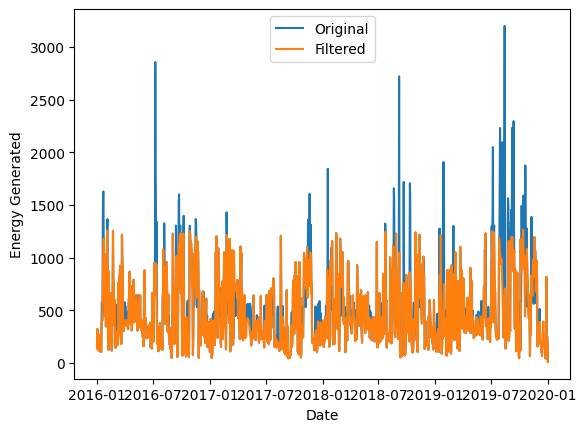

In [41]:
import matplotlib.pyplot as plt

plt.plot(df_comp2['date_time'], df_comp2['EnergyGenerated'], label='Original')

z_scores = np.abs((df_comp2['EnergyGenerated'] - df_comp2['EnergyGenerated'].mean()) / df_comp2['EnergyGenerated'].std())
threshold1 = 0.2
threshold2 = 2
df_filtered = df_comp2[z_scores <= threshold2]
df_filtered = df_filtered[threshold1 <= z_scores]

df_filtered['EnergyGenerated'] = df_filtered['EnergyGenerated'].fillna((df_filtered['EnergyGenerated'].shift(1) + df_filtered['EnergyGenerated'].shift(-1) + df_filtered['EnergyGenerated'].shift(-2) + df_filtered['EnergyGenerated'].shift(2)) / 4)


plt.plot(df_filtered['date_time'], df_filtered['EnergyGenerated'], label='Filtered')

plt.xlabel('Date')
plt.ylabel('Energy Generated')
plt.legend()


plt.show()


In [42]:
df_filtered['Temperature'] = df_comp['Temperature']
df_filtered['pressure'] = df_comp['Pressure']
df_filtered['humidity'] = df_comp['Humidity']
df_filtered['WindDirection(Degrees)'] = df_comp['WindDirection(Degrees)']
df_filtered['Speed'] = df_comp['Speed']
df_filtered['SunLightDuration'] = df_comp['SunLightDuration']
df_filtered['SolarRadiation'] = df_comp['SolarRadiation']

In [43]:
df_filtered.describe()

,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,455.801234,24.626188,14.375972,37.809853,135.133967,7.874676,673.738116,29.205762
std,308.433087,3.121055,2.521440,14.342757,93.043048,3.387953,15.563344,34.012432
min,8.739080,17.500000,8.000000,10.000000,0.000000,0.000000,652.000000,1.233300
25%,225.401890,22.500000,13.000000,28.000000,55.000000,6.000000,660.000000,3.005100
50%,343.949340,24.000000,14.000000,35.000000,117.000000,8.000000,672.000000,12.486000
75%,681.498440,27.500000,16.000000,44.000000,206.000000,10.000000,687.000000,44.237200
max,1265.010950,30.000000,21.000000,91.000000,359.000000,25.000000,704.000000,125.676000


In [44]:
df_filtered.isnull().sum()

date_time                 0
EnergyGenerated           0
Temperature               0
pressure                  0
humidity                  0
WindDirection(Degrees)    0
Speed                     0
SunLightDuration          0
SolarRadiation            0
dtype: int64

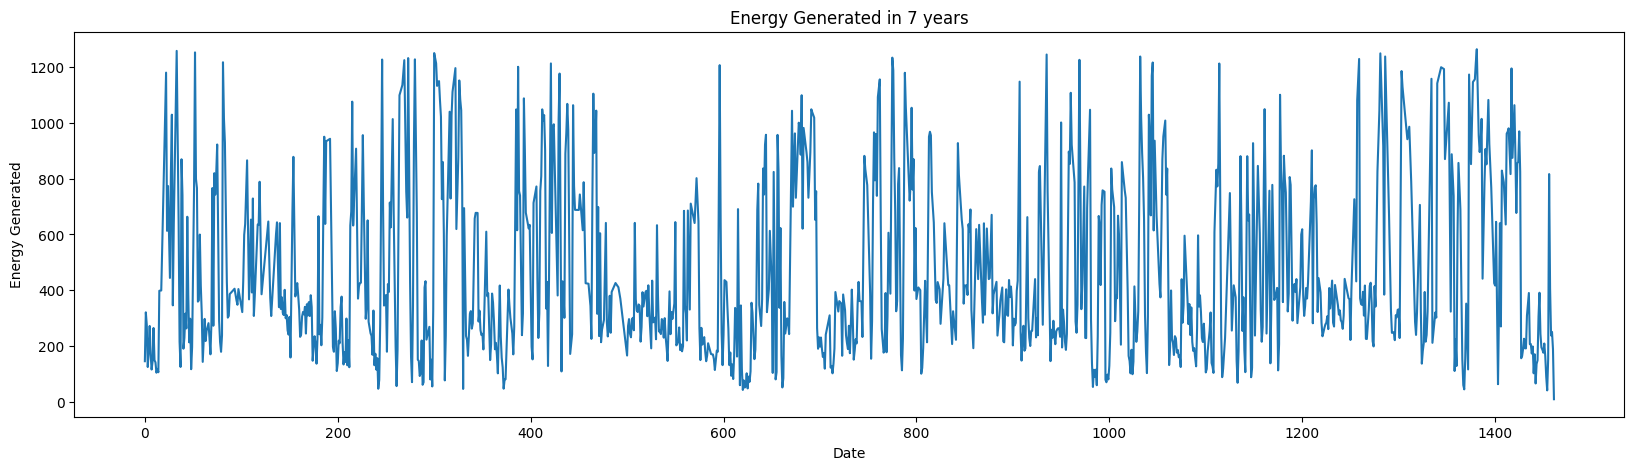

In [45]:
# Set the 'date' column as the index
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])


fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df_filtered['EnergyGenerated'].index, df_filtered['EnergyGenerated'])

ax.set_xlabel('Date')
ax.set_ylabel('Energy Generated')
ax.set_title('Energy Generated in 7 years')
plt.show()

In [46]:
import pandas as pd

# Extract month and day of the year from the 'datetime' column
df_filtered['month'] = df_filtered['date_time'].dt.month
df_filtered['day_of_year'] = df_filtered['date_time'].dt.dayofyear

summer_condition = ((df_filtered['month'] >= 6) & (df_filtered['month'] <= 8))
winter_condition = ((df_filtered['month'] >= 12) | (df_filtered['month'] <= 2))
rainy_condition = ((df_filtered['month'] >= 3) & (df_filtered['month'] <= 5))

# Create the 'isSummer', 'isWinter', and 'isRainy' columns
df_filtered['isSummer'] = summer_condition.astype(int)
df_filtered['isWinter'] = winter_condition.astype(int)
df_filtered['isRainy'] = rainy_condition.astype(int)


In [47]:
size = int(len(df_filtered)*0.8)
df_train, df_test = df_filtered.iloc[:size], df_filtered.iloc[size:]
df_test.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
1158,2019-03-04,215.03041,27.5,16,42,98,8,691.0,3.2882,3,63,0,0,1
1159,2019-03-05,267.94565,27.5,16,37,115,6,691.0,12.5258,3,64,0,0,1
1160,2019-03-06,724.91594,27.5,16,31,132,5,691.0,1.5008,3,65,0,0,1
1161,2019-03-07,1049.92041,27.5,16,26,149,4,691.0,1.7587,3,66,0,0,1
1162,2019-03-08,742.75600,27.5,15,24,143,6,691.0,2.3361,3,67,0,0,1


In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_filtered['EnergyGenerated'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -17.15991808308382
p-value: 6.852737011914926e-30
Critical Values: {'1%': -3.4360194465416387, '5%': -2.8640434537995523, '10%': -2.5681028978640104}


In [50]:
df_filtered.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
0,2016-01-01,145.18945,24.0,17,41,28,10,652.0,27.7148,1,1,0,1,0
1,2016-01-02,320.62800,24.0,18,43,31,9,652.0,19.5933,1,2,0,1,0
2,2016-01-03,275.31119,24.0,18,45,35,8,652.0,10.1999,1,3,0,1,0
3,2016-01-04,124.30838,24.0,18,46,38,8,652.0,10.1982,1,4,0,1,0
4,2016-01-05,183.91198,24.0,19,44,47,8,652.0,13.2127,1,5,0,1,0


## Using ARIMA model

In [51]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df_filtered["EnergyGenerated"],trace=True,suppress_warnings=True)
# stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=16053.570, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16549.126, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=16050.913, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=16173.641, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17887.735, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=16052.640, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=16052.632, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16054.554, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=16235.547, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.343 seconds


In [52]:
from statsmodels.tsa.arima.model import ARIMA
model_Arima = ARIMA(df_train["EnergyGenerated"],order=(5,0,2))
model_Arima = model_Arima.fit()
model_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        EnergyGenerated   No. Observations:                  925
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -6399.890
Date:                Thu, 29 Jun 2023   AIC                          12817.780
Time:                        13:33:26   BIC                          12861.248
Sample:                             0   HQIC                         12834.363
                                - 925                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.3951     32.219     13.793      0.000     381.246     507.544
ar.L1          1.2600      0.634      1.986      0.047       0.017       2.503
ar.L2         -0.4310      0.913     -0.472      0.637      -2.220       1.358
ar.L3          0.0686      0.354      0.194      0.846      -0.624       0.761
ar.L4         -0.0634      0.064     -0.991      0.322      -0.189       0.062
ar.L5          0.0547      0.036      1.514      0.130      -0.016       0.126
ma.L1         -0.6739      0.635     -1.062      0.288      -1.918       0.570
ma.L2          0.0005      0.559      0.001      0.999      -1.096       1.097
sigma2      6.015e+04   3058.970     19.664      0.000    5.42e+04    6.61e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               212.13
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.94
Prob(H) (two-sided):                  0.77   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
start = len(df_train)
end =len(df_train)+len(df_test)-1
pred_arima = model_Arima.predict(start=start,end=end,type='levels')
pred_arima.index = df_filtered.index[start:end+1]
print(pred_arima)

1158    406.689099
1159    420.661677
1160    434.688489
1161    455.879458
1162    457.499567
           ...    
1457    444.395105
1458    444.395105
1459    444.395105
1460    444.395105
1461    444.395105
Name: predicted_mean, Length: 232, dtype: float64


In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_arima = sqrt(mean_squared_error(pred_arima,df_test["EnergyGenerated"]))/10
print(rmse_arima)


33.06399712380816



## Using Arima with Features

In [55]:
# Define the exogenous variables
exog_vars = ['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Arima2 = ARIMA(df_train['EnergyGenerated'], order=(5, 2, 2), exog=df_train[exog_vars])
model_fit = model_Arima2.fit()

pred_arima2 = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_arima2.index = df_filtered.index[start:end+1]

In [56]:
# Evaluate the forecast
rmse_arima2 = sqrt(mean_squared_error(pred_arima2,df_test["EnergyGenerated"]))/10

print("rmse_arima2:", rmse_arima2)
print("Forecasted energy generation:", pred_arima2)


rmse_arima2: 39.15885334789633
Forecasted energy generation: 1158    309.703714
1159    271.026164
1160    323.099091
1161    367.377354
1162    334.348603
           ...    
1457    815.037064
1458    822.745036
1459    817.506893
1460    815.144579
1461    822.885488
Name: predicted_mean, Length: 232, dtype: float64


## Using AutoRegression Model

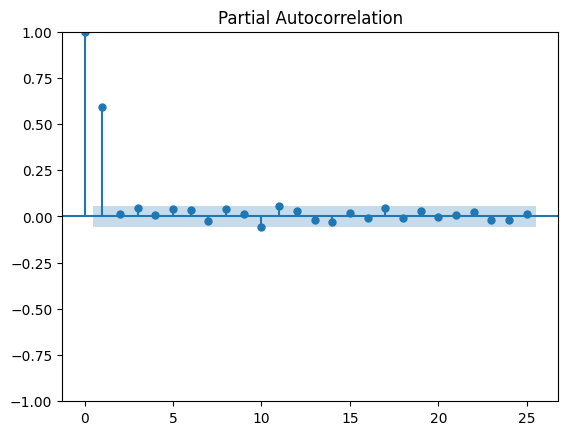

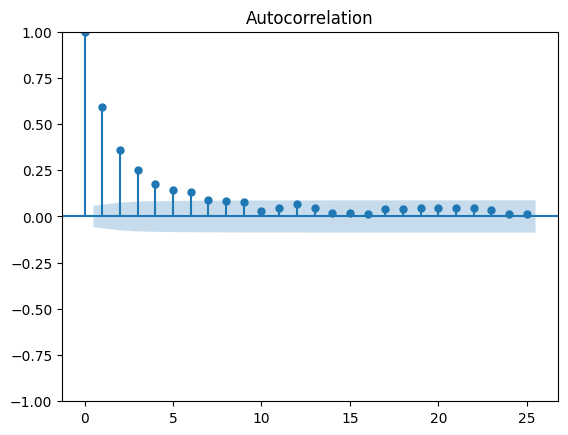

In [57]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf = plot_pacf(df_filtered['EnergyGenerated'],lags=25) 
acf = plot_acf(df_filtered['EnergyGenerated'],lags=25)

In [58]:
from statsmodels.tsa.ar_model import AutoReg
model_AutoReg = AutoReg(df_train['EnergyGenerated'],lags=2).fit()
print(model_AutoReg.summary())

                            AutoReg Model Results                             
Dep. Variable:        EnergyGenerated   No. Observations:                  925
Model:                     AutoReg(2)   Log Likelihood               -6389.564
Method:               Conditional MLE   S.D. of innovations            245.591
Date:                Thu, 29 Jun 2023   AIC                          12787.129
Time:                        13:33:30   BIC                          12806.439
Sample:                             2   HQIC                         12794.497
                                  925                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                186.1098     15.590     11.938      0.000     155.554     216.665
EnergyGenerated.L1     0.5893      0.033     17.898      0.000       0.525       0.654
EnergyGenerated.L2  

In [59]:
pred_autoreg = model_AutoReg.predict(start=start,end=end,dynamic = False)
pred_autoreg.index = df_filtered.index[start:end+1]
print(pred_autoreg)

1158    375.405901
1159    404.818399
1160    421.796305
1161    431.576033
1162    437.209146
           ...    
1457    444.861622
1458    444.861622
1459    444.861622
1460    444.861622
1461    444.861622
Length: 232, dtype: float64


In [60]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_autoreg = sqrt(mean_squared_error(df_test['EnergyGenerated'],pred_autoreg))/10
print(rmse_autoreg)


33.077644966346845


## Using SARIMA

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the exogenous variables
exog_vars =['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Sarima = SARIMAX(df_train['EnergyGenerated'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 12), exog=df_train[exog_vars])
model_fit = model_Sarima.fit()

In [62]:
# Forecast future energy generation
pred_sarima = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_sarima.index = df_filtered.index[start:end+1]

rmse_sarima = sqrt(mean_squared_error(pred_sarima,df_test["EnergyGenerated"]))/10


print("rmse_arima2:", rmse_sarima)

print("Forecasted energy generation:", pred_sarima)


rmse_arima2: 31.504019484811483
Forecasted energy generation: 1158    445.744336
1159    463.926493
1160    478.915488
1161    470.461830
1162    473.968887
           ...    
1457    421.914797
1458    431.119801
1459    443.354146
1460    451.732522
1461    466.653600
Name: predicted_mean, Length: 232, dtype: float64


## Using Prophet Model

In [63]:

from prophet.plot import plot_plotly, plot_components_plotly
import prophet as pt


In [64]:
df_prophet = pd.DataFrame()
df_prophet ["ds"] = data["date_time"]
df_prophet["y"] = data["EnergyGenerated"]
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

df_prophet = df_prophet.groupby(df_prophet['ds'].dt.date).agg({ 'y': 'sum'}).reset_index()

df_prophet.head()

,ds,y
0,2016-01-01,145.18945
1,2016-01-02,320.62800
2,2016-01-03,275.31119
3,2016-01-04,124.30838
4,2016-01-05,183.91198


In [65]:
# Filter out the outliers
z_scores = np.abs((df_prophet['y'] - df_prophet['y'].mean()) / df_prophet['y'].std())

threshold1 = 0.2
threshold2 = 2

df_prophet_filtered = df_prophet[z_scores <= threshold2]
df_prophet_filtered = df_prophet_filtered[threshold1 <= z_scores]


df_prophet_filtered['y'] = df_prophet_filtered['y'].fillna((df_prophet_filtered['y'].shift(1) + df_prophet_filtered['y'].shift(-1) + df_prophet_filtered['y'].shift(-2) + df_prophet_filtered['y'].shift(2)) / 4)


In [66]:
size = int(len(df_prophet_filtered)*0.8)

df_prophet_train = df_prophet_filtered.iloc[:size]
df_prophet_test = df_prophet_filtered.iloc[size:]

In [67]:
model_prophet = pt.Prophet()
model_prophet.fit(df_prophet_train)
future = model_prophet.make_future_dataframe(periods=415) 
forecast = model_prophet.predict(future) 

13:33:35 - cmdstanpy - INFO - Chain [1] start processing
13:33:36 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1335,2020-04-17,433.230727,152.352841,798.188073,428.741178,437.861762,41.854668,41.854668,41.854668,-15.228300,-15.228300,-15.228300,57.082968,57.082968,57.082968,0.0,0.0,0.0,475.085396
1336,2020-04-18,433.209455,145.748348,841.013361,428.702718,437.854525,54.539668,54.539668,54.539668,5.464222,5.464222,5.464222,49.075446,49.075446,49.075446,0.0,0.0,0.0,487.749123
1337,2020-04-19,433.188182,119.879459,803.972827,428.672225,437.847658,22.780698,22.780698,22.780698,-18.411931,-18.411931,-18.411931,41.192629,41.192629,41.192629,0.0,0.0,0.0,455.968880
1338,2020-04-20,433.166909,107.546148,778.104881,428.634890,437.849704,13.799280,13.799280,13.799280,-19.789754,-19.789754,-19.789754,33.589034,33.589034,33.589034,0.0,0.0,0.0,446.966189
1339,2020-04-21,433.145637,121.067043,821.296845,428.597556,437.845439,36.818193,36.818193,36.818193,10.412069,10.412069,10.412069,26.406124,26.406124,26.406124,0.0,0.0,0.0,469.963830


In [69]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1335,2020-04-17,475.085396,152.352841,798.188073
1336,2020-04-18,487.749123,145.748348,841.013361
1337,2020-04-19,455.968880,119.879459,803.972827
1338,2020-04-20,446.966189,107.546148,778.104881
1339,2020-04-21,469.963830,121.067043,821.296845


In [70]:
df_prophet_test.tail()

,ds,y
1457,2019-12-28,405.70411
1458,2019-12-29,237.60590
1459,2019-12-30,250.26988
1460,2019-12-31,188.05178
1461,2020-01-01,8.73908


In [71]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-232:]['yhat']

rmse_prophet = rmse(predictions,df_prophet_test['y'])/10

print(rmse_prophet)

37.68646634500303


In [72]:
print("Root Mean Square error for Auto Regression :",rmse_autoreg)
print("Root Mean Square error for ARIMA :",rmse_arima)
print("Root Mean Square error for SARIMA :",rmse_sarima)
print("Root Mean Square error for ARIMA with features :",rmse_arima2)
print("Root Mean Square error for Prophet :",rmse_prophet)

Root Mean Square error for Auto Regression : 33.077644966346845
Root Mean Square error for ARIMA : 33.06399712380816
Root Mean Square error for SARIMA : 31.504019484811483
Root Mean Square error for ARIMA with features : 39.15885334789633
Root Mean Square error for Prophet : 37.68646634500303
